# Simple Autoencoder using Keras
Autoencoders are models that try to condense a high dimensional source to a low dimension intermediary signature. This signature is then passed through a decoder that provides data in the dimensions of the source. Autoencoders can be approximated to compression algorithms in theory. These are lossy in nature. 

#### In the below example, we take the mnist digit dataset and then use a neural network with a single hidden layer to encode the images in 784 dimensional space to 32 dimensional signature, and try to replicate the 784 dimensional image from the signature. We are trying to build a simple encoder/decoder which can be used to compress images and replicate them with suitable accuracy.

In [33]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.cross_validation import train_test_split
from PIL import Image
from matplotlib.pyplot import imshow

## Data
we are going to use [MNIST digit recognition](https://www.kaggle.com/c/digit-recognizer/data) dataset from kaggle. The dataset consists of 42000 handwritten digits converted to images and serves as one of the datasets widely used in hello world programs for computer vision.  

In [2]:
data = np.genfromtxt('train.csv', delimiter=',', skip_header = 1)
print(data.shape)

(42000, 785)


## Preprocessing
In the MNIST dataset, each sample is an image of 28 X 28 pixels flattened to a 784 dimension space. Pixel values range from 0 to 255 and this dataset has only one channel. To help the neural network converge faster we will normalize pixel data between 0 and 1. We do this by dividing the pixel values with 255. 
The first column of the dataset is the label for the images. We can discard this column as we aren't interested in classification.

In [51]:
X = data[:,1:]
y = data[:,0]

X = X/255

print(X.shape)

(42000, 784)


## Neural Network
We are building a neural network which will be our autoencoder. The architecture of the neural network is pretty simple, we have one hidden layer of 32 neurons. The input and output layers both contain 784 neurons to match the input and output sample dimensions. As this is an encoder/decoder, the training data and the output are the same. We use keras to add the fully connected layers and have rectified linear activation for the hidden layer.

In [52]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(784, activation='linear'))
model.compile(loss='mse', optimizer=Adam(0.001))

## Training
This is pretty straightforward. As can be witnessed, we are feeding the neural network images and optimizing the loss on the logits of the same images as output.

In [53]:
model.fit(x = X, y = X, epochs=20, batch_size=200, verbose=1)

Epoch 1/20
42000/42000 [==============================] - 2s - loss: 0.0519       

## Validation
We are now trying to validate how well the model performs visually. As you can see in the above cell, the model has reached an acceptable optimization result in the training. However, to check if the model is able to replicate a number in a satisfactory manner, we will run some basic tests. 
And once we run a random sample through the encoder/decoder, we can notice the replication of the image. As you can see, the replication is lossy, has more jagged artifacts than compared to the input due to lower resolution reimaging.

In [72]:
i = np.random.randint(42000, size=1)
encoded = data[i,1:]
decoded = model.predict((X[i,]).reshape(-1,784))
decoded = decoded * 255

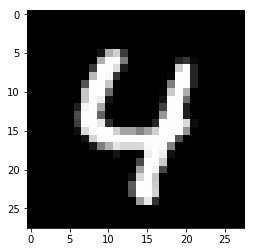

In [73]:
%matplotlib inline
im = Image.fromarray(encoded.reshape(28,28))
imshow(im)

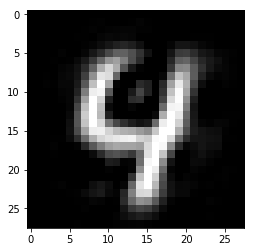

In [74]:
%matplotlib inline
im = Image.fromarray(decoded.reshape(28,28))
imshow(im)